<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

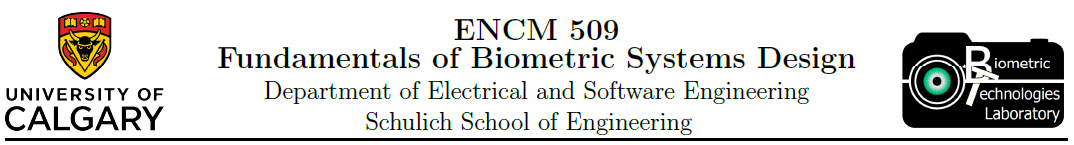

## Statistics

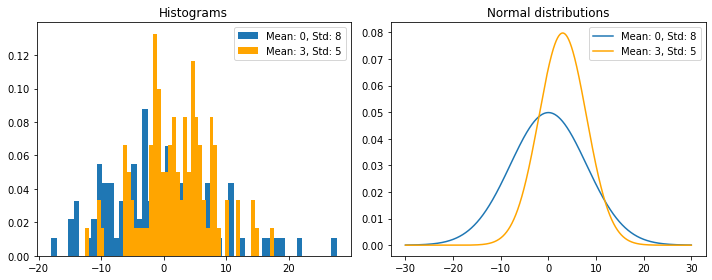

In [5]:
mu1, std1 = 0, 8 # blue
mu2, std2 = 3, 5 # orange

# population with higher variance
pop_norm1 = norm.rvs(mu1, std1, size=100)
pop_norm2 = norm.rvs(mu2, std2, size=100)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(pop_norm1, bins=50, density=True);
plt.hist(pop_norm2, bins=50, density=True, color='orange')
plt.title('Histograms')
plt.legend(['Mean: 0, Std: 8', 'Mean: 3, Std: 5'])

plt.subplot(1,2,2)
x1 = np.arange(-30, 30, 0.01)
plt.plot(x1, norm.pdf(x1, loc=mu1, scale=std1))
plt.plot(x1, norm.pdf(x1, loc=mu2, scale=std2), color='orange')
plt.legend(['Mean: 0, Std: 8', 'Mean: 3, Std: 5'])
plt.title('Normal distributions');

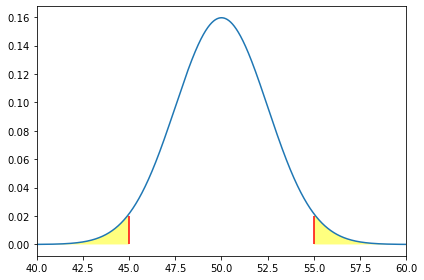

In [6]:
x = np.arange(0, 100, 0.01)

mu = 50
std = 2.5

x_pdf = norm.pdf(x, loc=mu, scale=std)

fig, ax = plt.subplots()
ax.plot(x, x_pdf)
# highlighting the critical regions
ax.fill_between(x, x_pdf, where=x<45, facecolor='yellow', alpha=0.5)
ax.fill_between(x, x_pdf, where=x>55, facecolor='yellow', alpha=0.5)

# lines corresponding to defined critical regions
ax.vlines([45, 55], 0, 0.02, 'r')
plt.xlim([40, 60]);

## Loading data
The data folder should be in the same directory as this Notebook

## Plotting based on Pressure

In [ ]:
# data folder:
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'

# 'genuine' or 'impostor'
subdir = 'impostor/'
data_dir = '../signature_samples/biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '2.csv')

coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

csv_file.head()

,X,Y,Pressure,Time
0,138.223151,124.155126,0.036630,0
1,138.223151,124.155126,0.076435,1
2,138.223151,124.155126,0.095971,15
3,138.223151,124.155126,0.095971,15
4,138.223151,124.155126,0.108913,15


In [8]:
# to correctly map the pressure into the colormap the normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

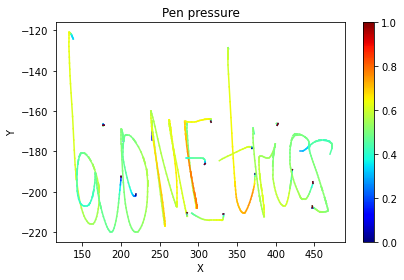

In [9]:
for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshould
        im = plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

## Plotting presure over time

In [10]:
# removing outliers (after normalization): < 250 and > 150
prs = []
for x in prs1:
    if (x > 150 and x < 250):
        prs.append(x)

In [11]:
np.max(prs), np.min(prs), np.mean(prs)

(199, 151, 166.09756097560975)

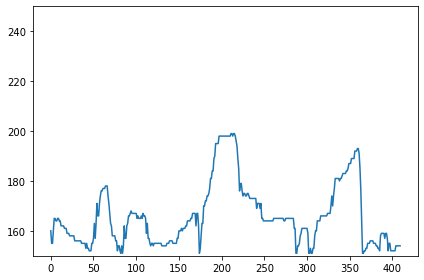

In [12]:
plt.plot(prs)
plt.ylim([150, 250]);

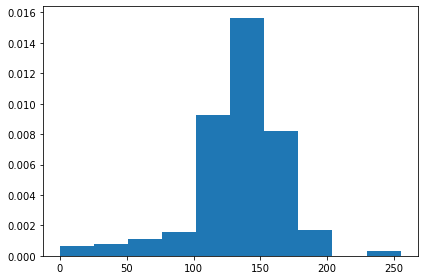

In [13]:
plt.hist(prs1, density=True);

133.69387755102042 34.827276744508666


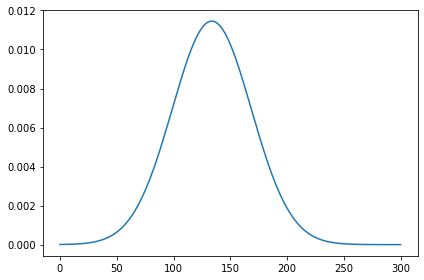

In [14]:
mu_prs = np.mean(prs1)
std_prs = np.std(prs1)
print(mu_prs, std_prs)

x = np.arange(0, 300, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf);

## Plotting and calculating the Velocity

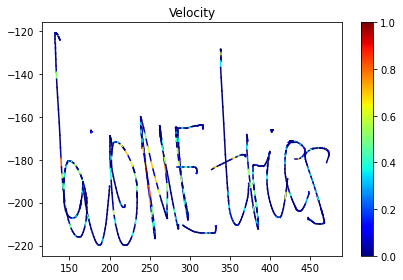

In [15]:
vel = np.zeros((len(time1)-1, 1))

for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1,0] - coord1[i,0])**2 + 
                       (coord1[i+1,1] - coord1[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = cm.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 17: # You may need to change this threshould
        plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
plt.title('Velocity')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

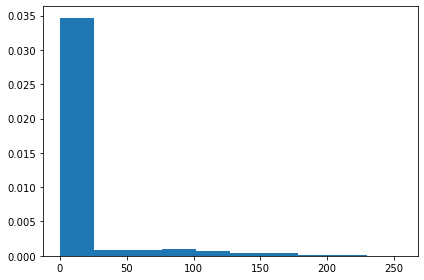

In [16]:
plt.hist(vel, density=True);

## Plotting Pressure in 3D

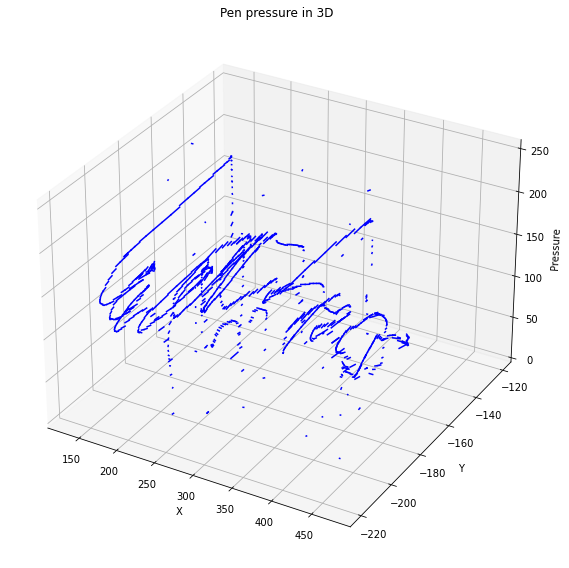

In [17]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i in range(len(coord1)-1):
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 18: # You may need to change this threshould
        ax.plot3D(coord1[i:i+2,0], -coord1[i:i+2,1], prs1[i], color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

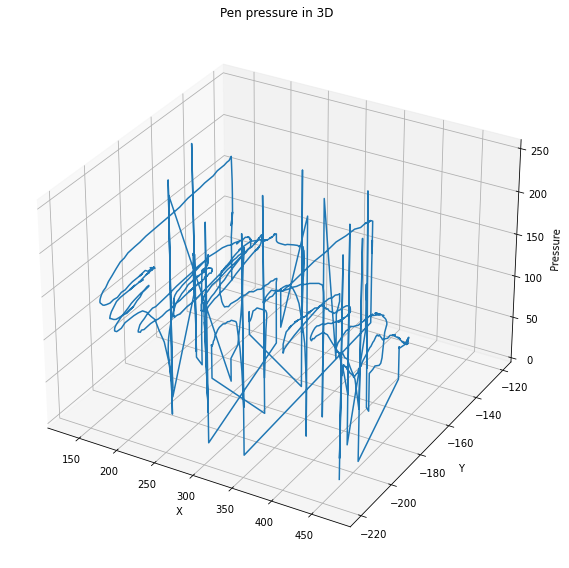

In [18]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

## Statistical Evaluation

In [19]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

In [20]:
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.21; velocity: 17.40
#1 - pressure: 0.26; velocity: 11.92
#2 - pressure: 0.30; velocity: 10.45
#3 - pressure: 0.25; velocity: 16.76
#4 - pressure: 0.20; velocity: 11.05
#5 - pressure: 0.23; velocity: 8.17
#6 - pressure: 0.22; velocity: 17.08
#7 - pressure: 0.20; velocity: 15.33
#8 - pressure: 0.20; velocity: 15.28
#9 - pressure: 0.22; velocity: 16.11
#10 - pressure: 0.22; velocity: 15.55
#11 - pressure: 0.19; velocity: 9.12
#12 - pressure: 0.22; velocity: 12.61
#13 - pressure: 0.27; velocity: 15.08
#14 - pressure: 0.27; velocity: 19.47
#15 - pressure: 0.28; velocity: 17.55
#16 - pressure: 0.21; velocity: 12.44
#17 - pressure: 0.26; velocity: 16.77
#18 - pressure: 0.28; velocity: 2.82
#19 - pressure: 0.24; velocity: 12.18
#20 - pressure: 0.22; velocity: 14.71
#21 - pressure: 0.27; velocity: 12.05
#22 - pressure: 0.23; velocity: 14.58
#23 - pressure: 0.25; velocity: 12.42
#24 - pressure: 0.31; velocity: 14.94
#25 - pressure: 0.27; velocity: 10.72
#26 - pressure: 0.24; vel

In [21]:
# getting only the 1st velocity 'mean' and 'std'
print(stats_measures[0,0], stats_measures[0,1])

n = norm(stats_measures[0,0], stats_measures[0,1])

17.40276903713027 41.453395911666114


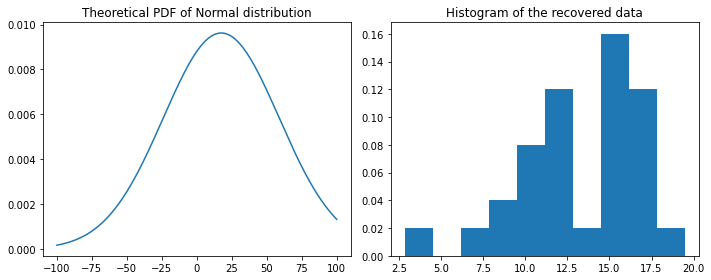

In [22]:
x = np.arange(-100, 100, 0.1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, n.pdf(x))
plt.title('Theoretical PDF of Normal distribution');

plt.subplot(1,2,2)
plt.hist(stats_measures[:,0], density=True);
plt.title('Histogram of the recovered data');

# put the name of the set in the title

## Exercises

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

**Specific Questions** (See the handout PDF for details)

- **Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. Explain why it is necessary.

- **Exercise 4** (3 marks): Now  perform statistical analysis of pressure and velocity distribution  across average values of pressure or 30 signatures of the same person. We will represent the pressure of each signature by its average (mean) value, and then consider the distribution of these average values across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate average (mean) values and deviation from average (which will be calculated using standard deviation) for pressure. Plot a normal distribution of the average pressure values across the 30 signatures of the same individual. Perform the same for velocity. 

- **Exercise 5** (3 marks): Perform statistical analysis of average pressure and velocity distribution across 30 impostor signatures. As an "impostor", you can use either the 30 "forged" signatures (or part $b$ of the pre-recorded set), or 30 writings by yourself, of different shape/word (or part $c$ of the pre-recorded set). Represent the pressure (or velocity) of each signature by its average (mean), and then consider the distribution of these averages across 30 impostor signatures. How different are those distributions for "genuine" signatures from Exercise 4 and the "impostor" from Exercise 5?

### Introduction
The objective of this lab 2 is to get used to signature data acquisition and statistical analysis, prior to verification or recognition. We used the Wacom Bamboo Fun Signature Pad with its corresponding driver and SigGet to record 30 samples each of genuine and impostor signatures. We also got 30 samples of a written word to compare.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# to keep a good size for the plot figure, not the plot area!
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

- **Exercise 1** (2 marks)

REAL mean: 49.95; std: 5.15


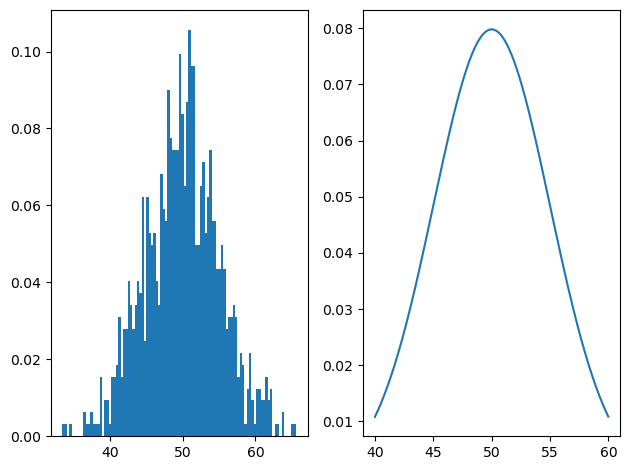

In [19]:
# Theorectical Mean and Std
mu = 50

#Create another set of 1000 samples with mu = 50 and sigma = 5
qtt_samples = 1000
std = 5

pop_norm = norm.rvs(mu, std, size=qtt_samples)

plt.subplot(1,2,1)
#Plot the histogram with 100 bins.
plt.hist(pop_norm, bins = 100, density=True);
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

x = np.arange(40, 60, 0.01)
plt.subplot(1,2,2)
x_pdf = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, x_pdf)
plt.show()

Comparing the results of the calculations of both sets, what conclusions can be drawn from the amount of samples compared with the mean and standard deviation calculated and the number of bins considered? 

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a "genuine" person, and an "impostor" as a signature that replicates the shape but not the original pressure. Load the sample signature provided.

In [7]:
# data folder:
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'
# 'genuine' or 'impostor'
subdir = 'impostor/'
data_dir = '../signature_samples/biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '2.csv')

coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

csv_file.head()

# to correctly map the pressure into the colormap the normalization is required
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1. astype (int)
pressuremap = cm.get_cmap('jet', np.max(prs1 )+1)

for i in range(len(prs1)==1):
    c = pressuremap (prs1[i]). squeeze ()
    im = plt.plot( coord1 [i:i+2 ,0] , coord1 [i:i+2 ,1] , linewidth =2, c=c)
    sm = cm. ScalarMappable (cmap='jet', norm=plt. Normalize (vmin =0, vmax =1))
    plt. colorbar (sm)

FileNotFoundError: [Errno 2] No such file or directory: '../signature_samples/biometrics/impostor/2.csv'

NameError: name 'prs1' is not defined